## Random Forest

In [ ]:
# import libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Load the Data

In [2]:
df=pd.read_excel(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\New folder\Random Forest\Random Forest\glass.xlsx')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Exploratory Data Analysis (EDA):

In [ ]:
# check for duplicates

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [7]:
df.duplicated().sum()

1

In [ ]:
# remove duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [ ]:
# check for missing values

In [10]:
df.isna()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
# check for outliers

In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

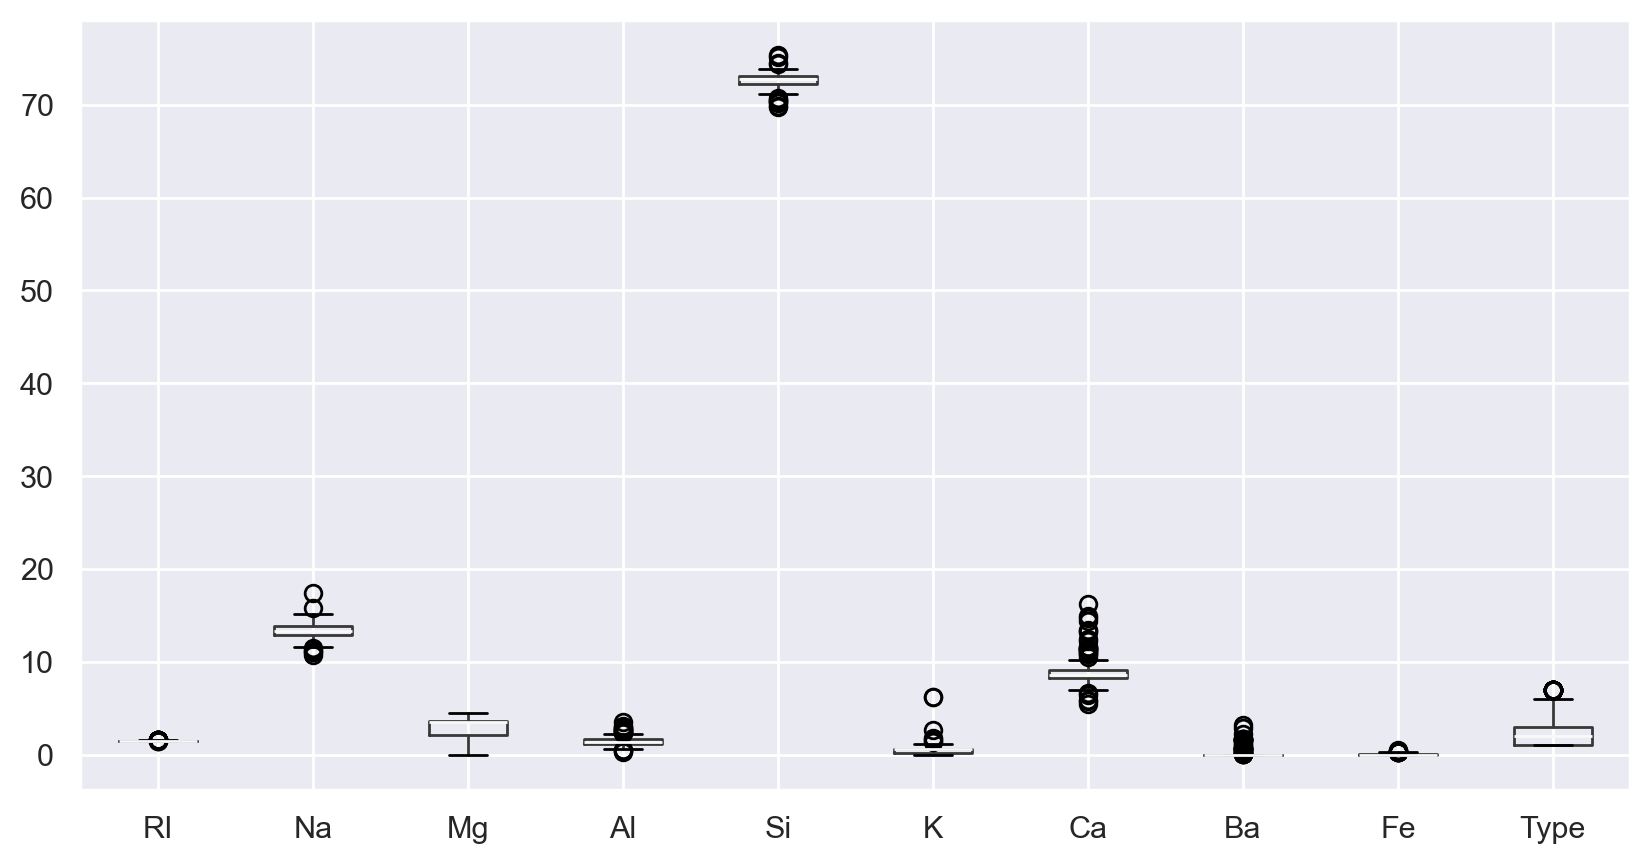

In [14]:
df.boxplot()

###  Data Visualization:

In [ ]:
# Histogram:

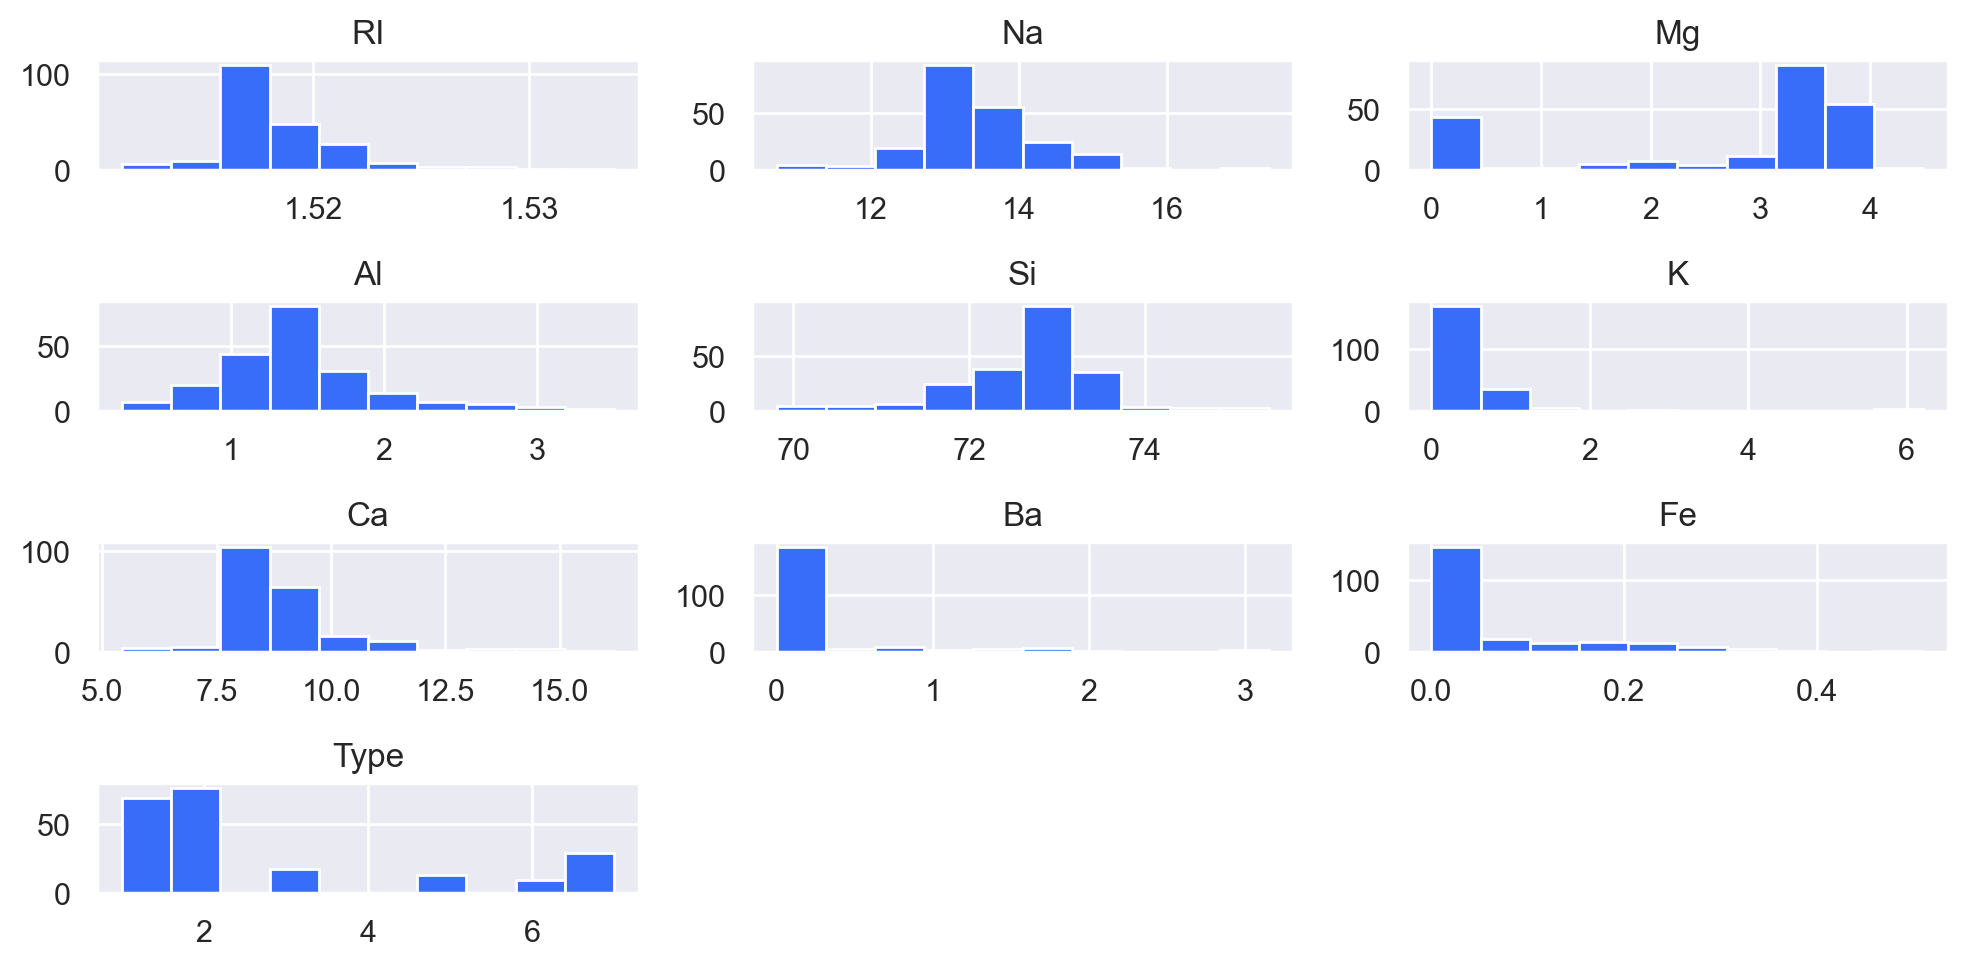

In [15]:
df.hist()
plt.tight_layout()

In [ ]:
# PairPlot

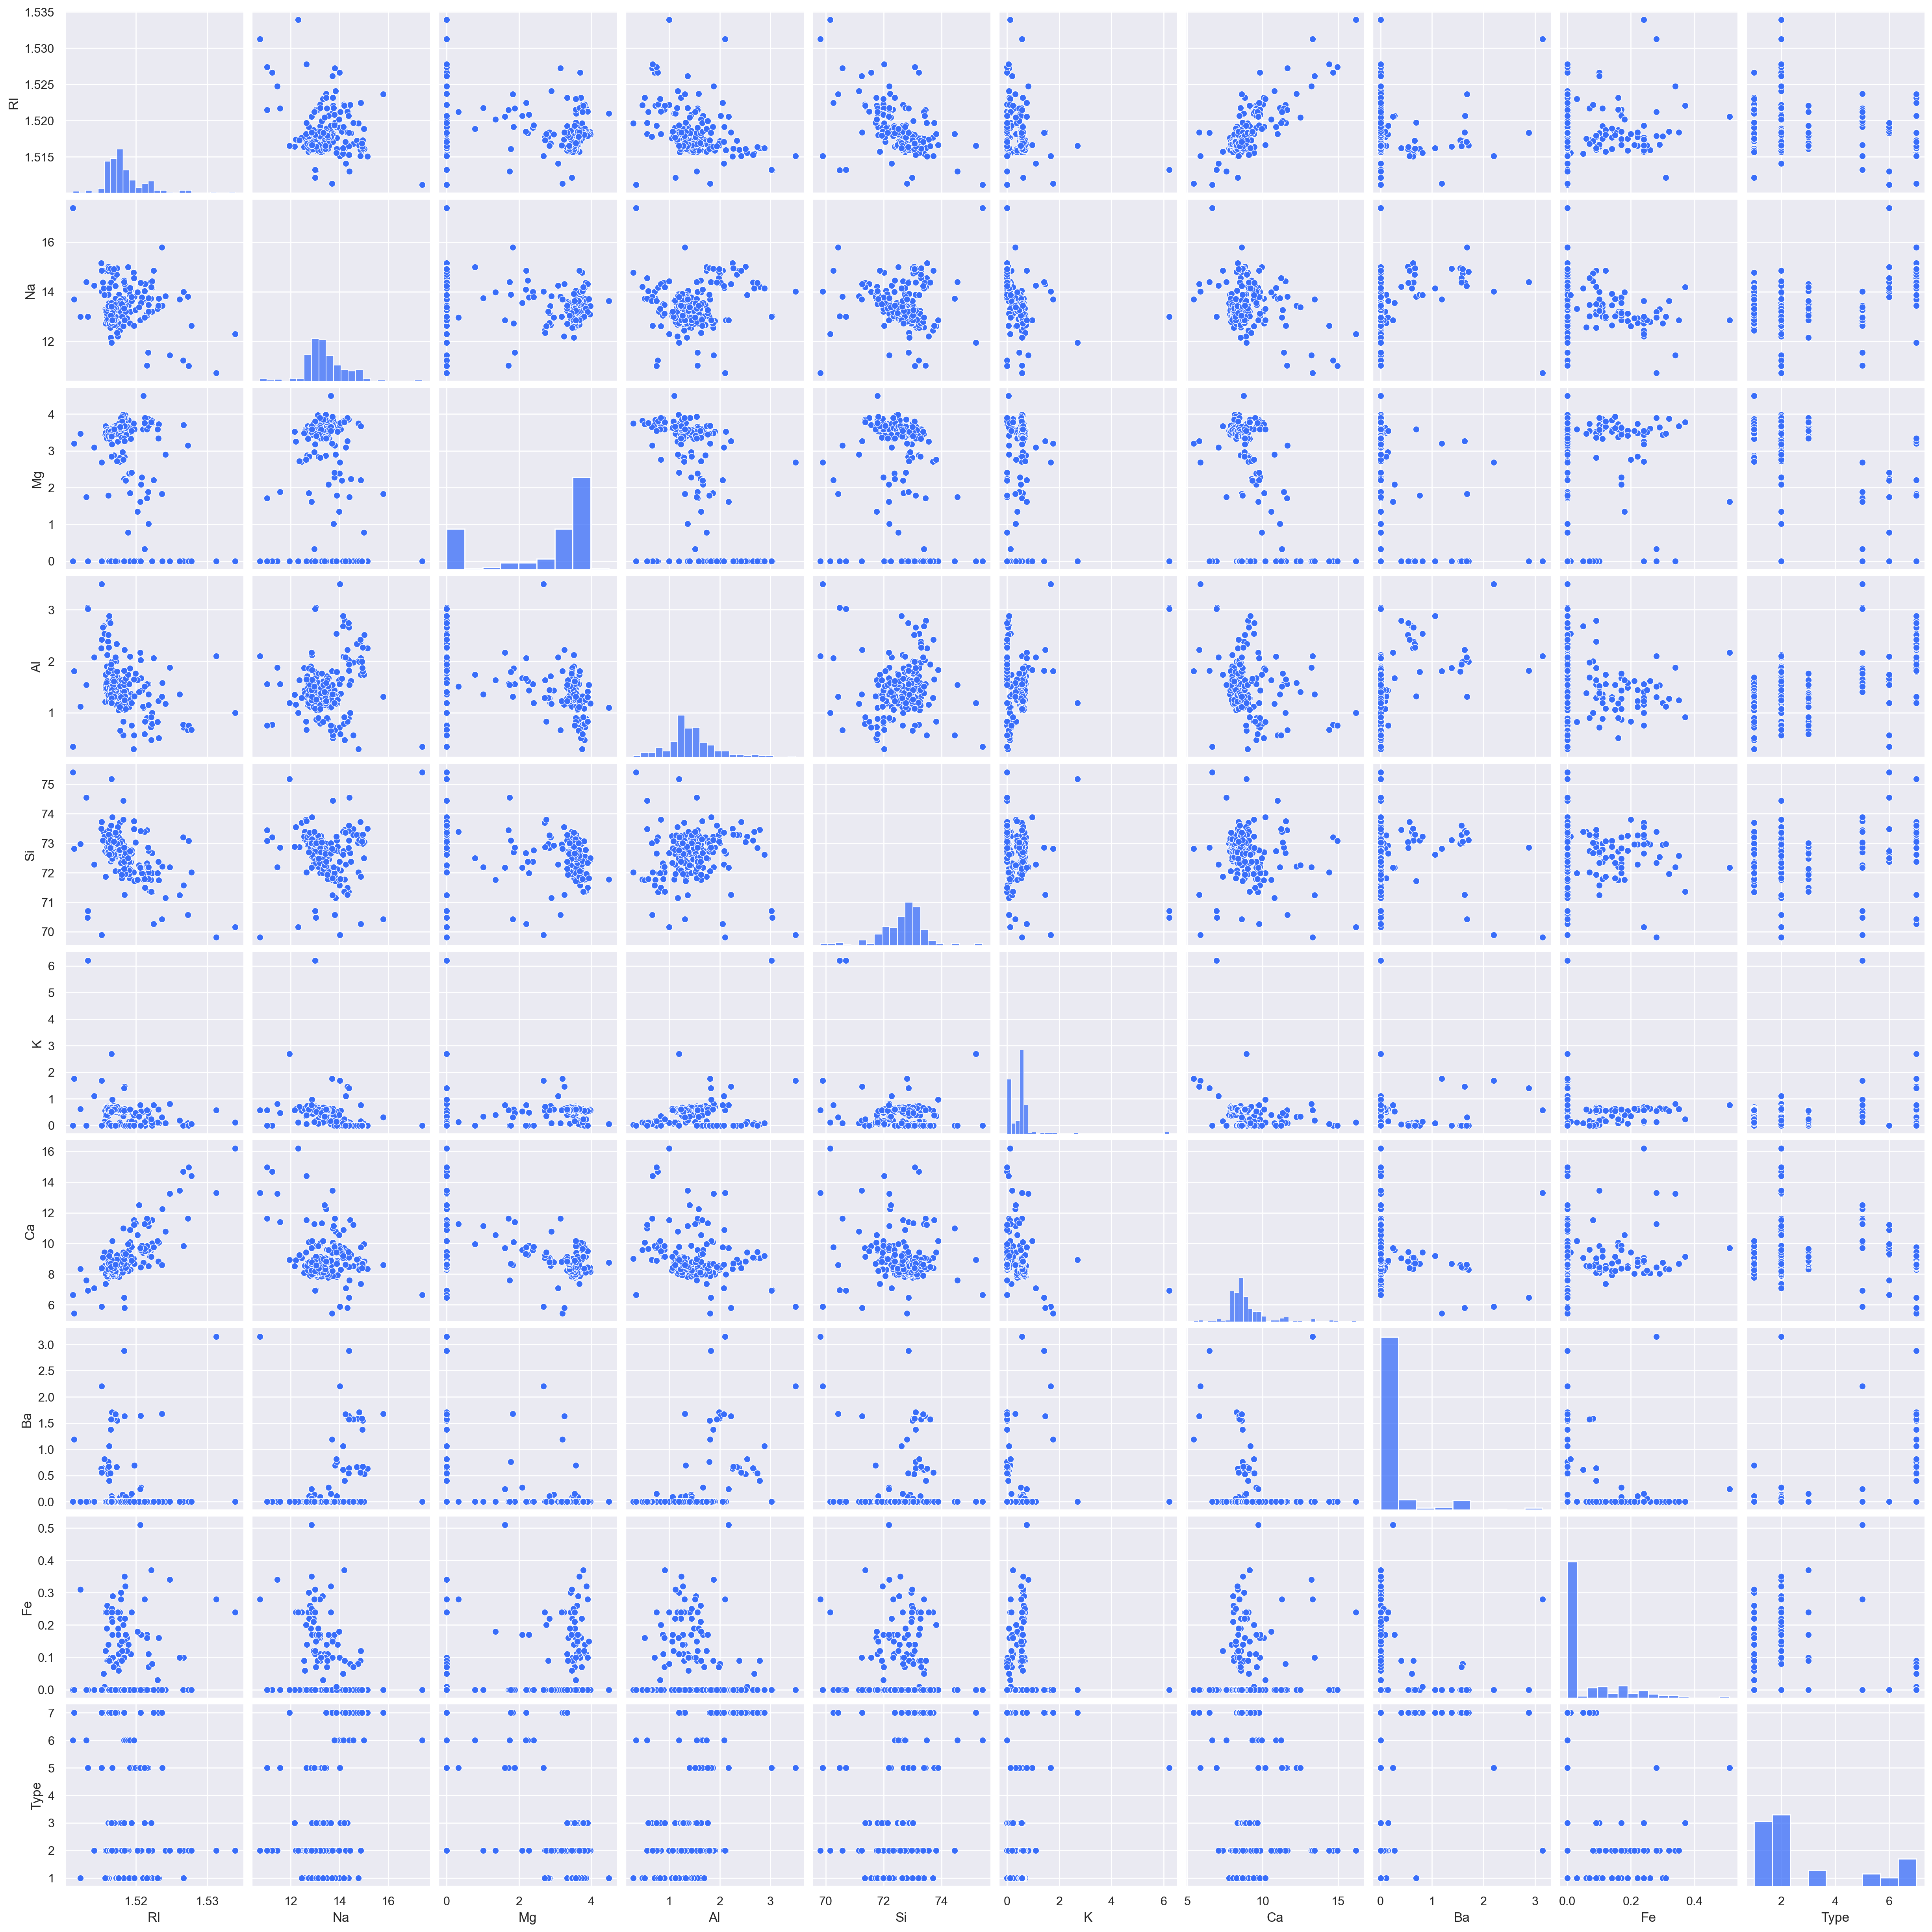

In [16]:
sns.pairplot(df)

In [ ]:
#Correlation coefficient

In [13]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [ ]:
# Heatmap

<Axes: >

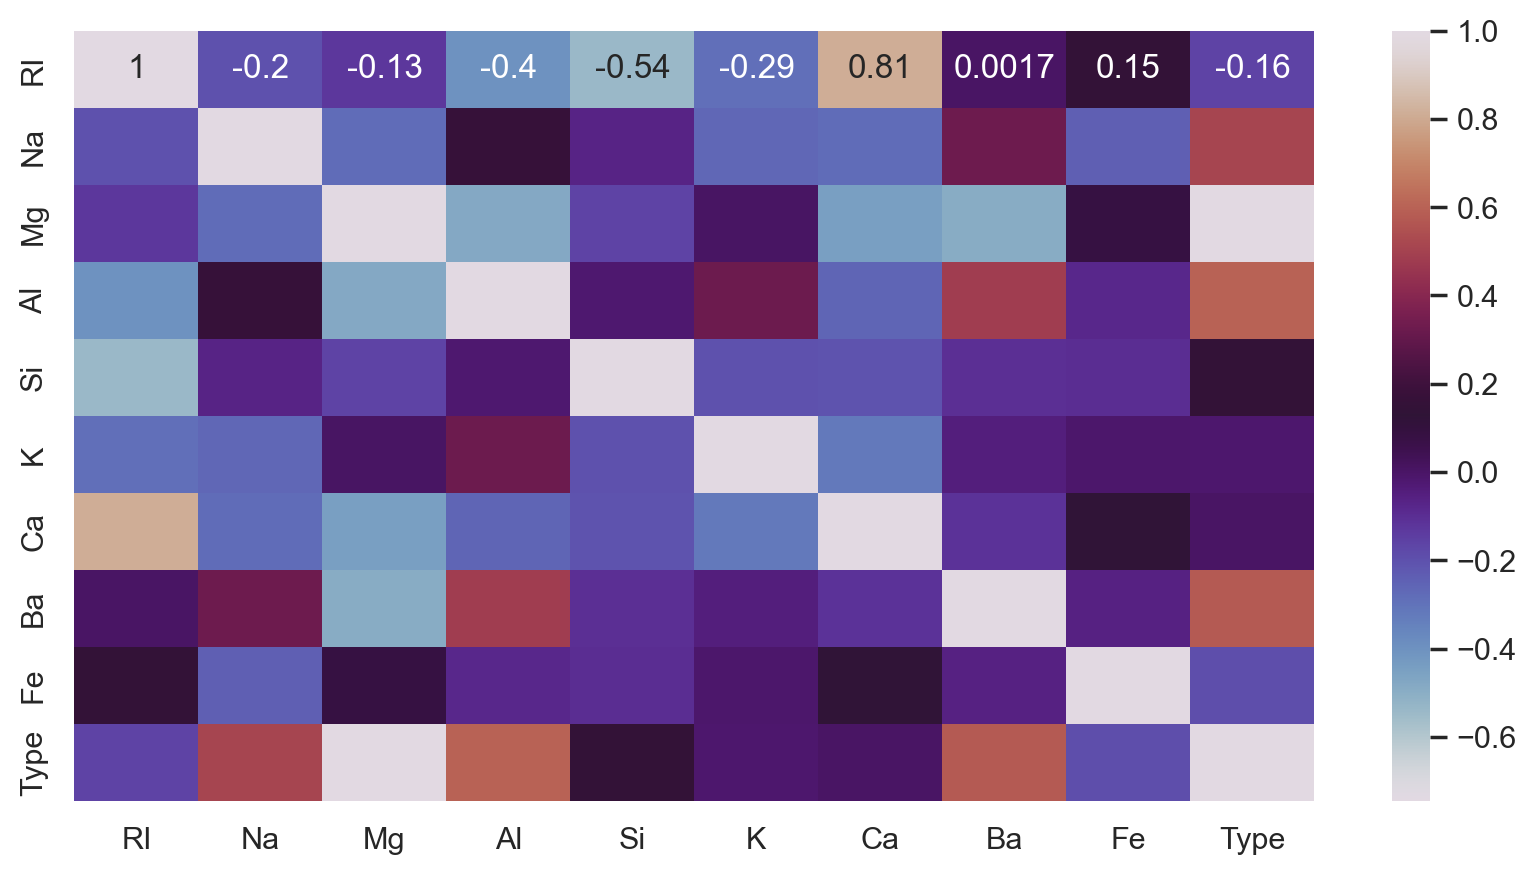

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='twilight')

### Data Preprocessing:

In [ ]:
# Replace target values

In [14]:
df['Type'].replace([1,2,3,4,5,6,7],['building_float','building_non_float','vehicle_float','vehicle_non_float','container','tableware','headlamp'], inplace=True)

In [15]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_float
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_float
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_float
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamp
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamp
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamp
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamp


In [16]:
y=df['Type']
y

0      building_float
1      building_float
2      building_float
3      building_float
4      building_float
            ...      
209          headlamp
210          headlamp
211          headlamp
212          headlamp
213          headlamp
Name: Type, Length: 213, dtype: object

In [17]:
df.drop(columns=['Type'],inplace=True)

In [18]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
# scaling the data

In [19]:
sc=StandardScaler()

In [20]:
x=sc.fit_transform(df)
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

### Random Forest Model Implementation:

In [ ]:
# split the data into traing and testing sets

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [22]:
xtrain

array([[ 1.28303431, -0.23821559,  0.75734185, ...,  0.74930938,
        -0.35380764, -0.58830108],
       [-1.0601185 ,  1.77468884, -1.86017161, ..., -0.39653595,
         0.77278541, -0.58830108],
       [-0.37601042, -0.65552504,  0.55599466, ..., -0.36841705,
        -0.35380764, -0.58830108],
       ...,
       [-0.67344871, -0.07865609,  0.61848172, ..., -0.74802225,
        -0.35380764, -0.58830108],
       [ 0.05362268, -0.2504894 ,  0.66013976, ..., -0.3824765 ,
        -0.17274805,  1.15779582],
       [-0.1248403 , -0.81508454,  0.55599466, ..., -0.1926739 ,
        -0.35380764, -0.58830108]])

In [23]:
xtest

array([[-0.05543803,  0.3877486 , -1.86017161, -1.79780964,  2.32449882,
        -0.76555411,  1.4311928 , -0.35380764, -0.58830108],
       [-0.69988767,  0.97689136, -1.86017161,  2.70942988,  1.04241296,
        -0.70417146,  0.06039624,  0.45090168,  0.33610316],
       [ 5.14973217, -1.35513207, -1.86017161, -0.90848883, -3.23120658,
        -0.58140614,  5.08665032, -0.35380764,  1.8767769 ],
       [ 1.27972944,  1.25918893, -1.86017161, -0.90848883,  0.01933434,
        -0.61209747,  1.80376828, -0.35380764,  0.23339158],
       [-0.08848673,  0.03180818,  0.13247126, -0.52446394,  0.2394905 ,
         0.07845741,  0.05336651, -0.35380764, -0.58830108],
       [-0.27025458, -1.02373927,  0.54905165, -0.14043905,  0.95176042,
         0.15518573, -0.28406034, -0.35380764,  0.02796841],
       [ 0.23208566,  0.2404629 ,  0.65319675, -0.68615863, -0.01951674,
        -0.55071482, -0.13643609, -0.35380764, -0.58830108],
       [-0.74285098,  0.01953437,  0.50045061, -0.46382843,  0

In [24]:
ytrain

48         building_float
202              headlamp
27         building_float
59         building_float
41         building_float
              ...        
204              headlamp
138    building_non_float
73     building_non_float
141    building_non_float
37         building_float
Name: Type, Length: 170, dtype: object

In [25]:
ytest

109    building_non_float
192              headlamp
107    building_non_float
108    building_non_float
52         building_float
33         building_float
60         building_float
153         vehicle_float
4          building_float
31         building_float
119    building_non_float
40         building_float
94     building_non_float
70     building_non_float
162         vehicle_float
113    building_non_float
95     building_non_float
98     building_non_float
152         vehicle_float
38         building_float
45         building_float
178             tableware
85     building_non_float
18         building_float
159         vehicle_float
35         building_float
74     building_non_float
123    building_non_float
19         building_float
63         building_float
170             container
181             tableware
34         building_float
11         building_float
29         building_float
0          building_float
160         vehicle_float
149         vehicle_float
131    build

In [44]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [45]:
yp = rfc.predict(xtest)
yp

array(['tableware', 'headlamp', 'building_non_float', 'tableware',
       'building_float', 'building_float', 'building_float',
       'vehicle_float', 'building_float', 'building_float',
       'building_non_float', 'building_float', 'building_non_float',
       'building_non_float', 'building_float', 'building_non_float',
       'building_non_float', 'building_non_float', 'vehicle_float',
       'building_float', 'building_float', 'tableware',
       'building_non_float', 'building_float', 'vehicle_float',
       'vehicle_float', 'building_non_float', 'building_non_float',
       'building_non_float', 'vehicle_float', 'building_non_float',
       'tableware', 'building_float', 'building_float', 'building_float',
       'building_float', 'building_non_float', 'building_non_float',
       'building_non_float', 'building_float', 'building_float',
       'headlamp', 'headlamp'], dtype=object)

In [ ]:
# Evaluation Metrics

In [47]:
print(classification_report(ytest,yp))

                    precision    recall  f1-score   support

    building_float       0.94      0.83      0.88        18
building_non_float       0.73      0.85      0.79        13
         container       0.00      0.00      0.00         1
          headlamp       1.00      1.00      1.00         3
         tableware       0.50      1.00      0.67         2
     vehicle_float       0.60      0.50      0.55         6

          accuracy                           0.79        43
         macro avg       0.63      0.70      0.65        43
      weighted avg       0.79      0.79      0.78        43



### Bagging and Boosting Methods

In [29]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Bagging Classifier with Random Forest as the base estimator

In [30]:
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

In [ ]:
# Predictions and Evaluation

In [31]:
y_pred_bagging = bagging_model.predict(xtest)
y_pred_bagging

array(['tableware', 'headlamp', 'building_non_float', 'tableware',
       'building_float', 'building_float', 'building_float',
       'vehicle_float', 'building_float', 'building_float',
       'building_non_float', 'building_float', 'building_non_float',
       'building_non_float', 'building_float', 'building_non_float',
       'building_non_float', 'building_non_float', 'building_float',
       'building_float', 'building_float', 'tableware',
       'building_non_float', 'building_float', 'building_non_float',
       'vehicle_float', 'building_non_float', 'building_non_float',
       'building_non_float', 'building_float', 'container', 'tableware',
       'building_float', 'building_float', 'building_float',
       'building_float', 'building_non_float', 'building_non_float',
       'building_non_float', 'building_float', 'building_float',
       'headlamp', 'headlamp'], dtype=object)

In [35]:
print("Bagging Accuracy:", accuracy_score(ytest, y_pred_bagging))
print("Bagging F1 Score:", f1_score(ytest, y_pred_bagging, average='weighted'))

Bagging Accuracy: 0.7906976744186046
Bagging F1 Score: 0.768549280177187


In [ ]:
# Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Gradient Boosting Classifier

In [42]:
gboost_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gboost_model.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [43]:
y_pred_gboost = gboost_model.predict(xtest)
y_pred_gboost

array(['tableware', 'headlamp', 'building_non_float',
       'building_non_float', 'building_float', 'building_float',
       'building_float', 'vehicle_float', 'building_float',
       'building_float', 'building_non_float', 'building_float',
       'building_non_float', 'building_float', 'building_float',
       'building_non_float', 'building_non_float', 'building_non_float',
       'vehicle_float', 'building_float', 'building_float', 'tableware',
       'building_non_float', 'building_float', 'building_float',
       'vehicle_float', 'building_non_float', 'building_non_float',
       'building_float', 'building_float', 'building_non_float',
       'tableware', 'building_float', 'building_float', 'building_float',
       'vehicle_float', 'building_non_float', 'building_non_float',
       'building_non_float', 'building_float', 'building_float',
       'headlamp', 'headlamp'], dtype=object)

In [41]:
print("Gradient Boosting Accuracy:", accuracy_score(ytest, y_pred_gboost))
print("Gradient Boosting F1 Score:", f1_score(ytest, y_pred_gboost, average='weighted'))

Gradient Boosting Accuracy: 0.7906976744186046
Gradient Boosting F1 Score: 0.7711665153525619
